## 1. Download Dataset

In [3]:
import keras 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
X_train.shape # 60000 rows, 28 x 28 pixels

(60000, 28, 28)

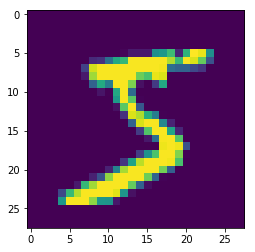

In [3]:
plt.imshow(X_train[0])

In [4]:
y_train[0]

5

In [5]:
num_classes = 10 # 10 classes of digits
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [6]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [7]:
y_train.shape

(60000, 10)

In [8]:
keras.utils.to_categorical(2, 5)

array([0., 0., 1., 0., 0.], dtype=float32)

In [8]:
# Flatten from 28x28 to 784 (because we are using MLP)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [9]:
# Scale from 0-255 into 0-1
# Scaling is generally recommended for neural networks
# for faster convergence
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


## 2. Prediction With Artificial Neural Network


In [1]:
#Implementing Deep Learning Model using Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.callbacks import TensorBoard
import time

Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(Dense(512,input_shape=(784,), activation='relu'))
model.add(Dense(512, kernel_constraint=maxnorm(3), activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
# Compile model
sgd = SGD(lr=0.1, momentum=0.8, decay=0.001, nesterov=False)
tensorboard = TensorBoard(log_dir='./logs/mnist_mlp/%d' % time.time())
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [12]:
history=model.fit(X_train, y_train, epochs=80, batch_size=800, callbacks=[tensorboard], validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/80
60000/60000 [==============================] - 2s 32us/step - loss: 0.9161 - acc: 0.7389 - val_loss: 0.3410 - val_acc: 0.9044
Epoch 2/80
60000/60000 [==============================] - 1s 24us/step - loss: 0.3307 - acc: 0.9040 - val_loss: 0.2692 - val_acc: 0.9225
Epoch 3/80
60000/60000 [==============================] - 1s 24us/step - loss: 0.2745 - acc: 0.9217 - val_loss: 0.2305 - val_acc: 0.9350
Epoch 4/80
60000/60000 [==============================] - 1s 24us/step - loss: 0.2370 - acc: 0.9316 - val_loss: 0.2045 - val_acc: 0.9402
Epoch 5/80
60000/60000 [==============================] - 1s 24us/step - loss: 0.2114 - acc: 0.9387 - val_loss: 0.1860 - val_acc: 0.9466
Epoch 6/80
60000/60000 [==============================] - 1s 24us/step - loss: 0.1908 - acc: 0.9459 - val_loss: 0.1707 - val_acc: 0.9491
Epoch 7/80
60000/60000 [==============================] - 1s 24us/step - loss: 0.1751 - acc: 0.9494 - val_loss: 0.1579 - val_acc

60000/60000 [==============================] - 1s 24us/step - loss: 0.0366 - acc: 0.9899 - val_loss: 0.0645 - val_acc: 0.9796
Epoch 61/80
60000/60000 [==============================] - 1s 24us/step - loss: 0.0364 - acc: 0.9904 - val_loss: 0.0642 - val_acc: 0.9790
Epoch 62/80
60000/60000 [==============================] - 1s 24us/step - loss: 0.0359 - acc: 0.9901 - val_loss: 0.0640 - val_acc: 0.9796
Epoch 63/80
60000/60000 [==============================] - 1s 24us/step - loss: 0.0350 - acc: 0.9909 - val_loss: 0.0637 - val_acc: 0.9800
Epoch 64/80
60000/60000 [==============================] - 1s 24us/step - loss: 0.0345 - acc: 0.9910 - val_loss: 0.0635 - val_acc: 0.9800
Epoch 65/80
60000/60000 [==============================] - 1s 24us/step - loss: 0.0344 - acc: 0.9909 - val_loss: 0.0632 - val_acc: 0.9795
Epoch 66/80
60000/60000 [==============================] - 1s 24us/step - loss: 0.0340 - acc: 0.9910 - val_loss: 0.0630 - val_acc: 0.9801
Epoch 67/80
60000/60000 [=====================

In [13]:
for layer in model.layers:
    print(layer.get_config())
    print(layer.get_weights())

{'name': 'dense_1', 'trainable': True, 'batch_input_shape': (None, 784), 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
[array([[-0.05628445,  0.05375183, -0.02305412, ...,  0.02039278,
        -0.04398101,  0.00737086],
       [ 0.04082758,  0.01688162,  0.06414245, ...,  0.00428028,
        -0.02729251,  0.01156904],
       [ 0.02022351, -0.03798806, -0.01457847, ...,  0.0531452 ,
        -0.00573099, -0.00707247],
       ...,
       [-0.01392486,  0.03164809, -0.00105375, ...,  0.02651798,
         0.00853225,  0.04310568],
       [-0.02666661, -0.00413163, -0.01628517, ..., -0.03590861,
         0.05706035,  0.02446676],
  

9


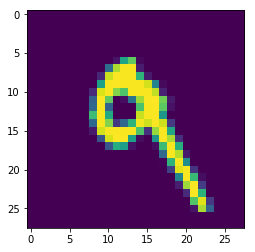

In [14]:
# for display, un-flatten to 28x28
plt.imshow(X_test[7].reshape(28, 28))

# argmax converts one-hot to the value (which is the maximum index)
# [0 .... 0 1] => 9 (9 is the 9th index in the one-hot array)
print(y_test[7].argmax())

In [15]:
# reshape to (1, anything)
pred = model.predict(X_test[7].reshape(1, -1)) # can also .reshape(1, 784)
pred.argmax()

9

In [16]:
model.predict_classes(X_test[7].reshape(1, -1))

array([9], dtype=int64)

In [17]:
y_pred = model.predict_classes(X_test) # return labels so that
                                       # sklearn metrics work
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [18]:
# Truth needs to be converted from one-hot to labels again
# so that sklearn metrics work
y_test.argmax(axis=1) # column-wise, axis=1 (10 columns)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

print(classification_report(y_test.argmax(axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



[Text(33.0, 0.5, 'Truth'), Text(0.5, 15.0, 'Clf_Prediction')]

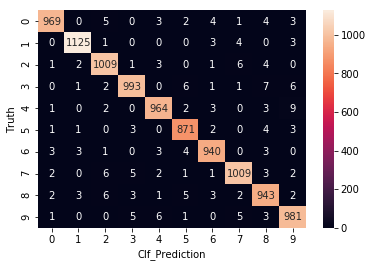

In [20]:
ax = sns.heatmap(confusion_matrix(y_pred, y_test.argmax(axis=1)), annot=True, fmt='d')
ax.set(xlabel='Clf_Prediction', ylabel='Truth')

In [21]:
accuracy_score(y_pred, y_test.argmax(axis=1))

0.9804

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


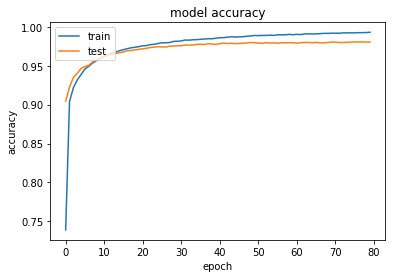

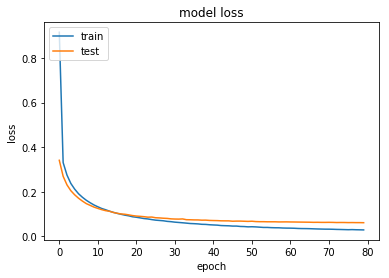

In [22]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()